# Simple neural network

In [90]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from lab_utils_common import dlc, sigmoid
from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [91]:
X, Y = load_coffee_data()

print(X.shape, Y.shape)

(200, 2) (200, 1)


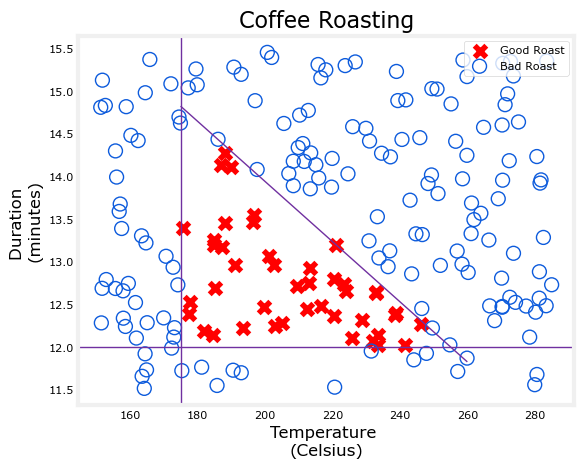

In [92]:
plt_roast(X, Y)

# Normalize Data

In [93]:
print(f"temperature Max, min pre nomalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration Max, min pre nomalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")
norm_1 = tf.keras.layers.Normalization(axis=1)
norm_1.adapt(X)

Xn = norm_1(X)

#post normalization
print(f"temperature Max, min post nomalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration Max, min post nomalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

temperature Max, min pre nomalization: 284.99, 151.32
Duration Max, min pre nomalization: 15.45, 11.51
temperature Max, min post nomalization: 1.66, -1.69
Duration Max, min post nomalization: 1.79, -1.70


In [94]:
#Activation function
g = sigmoid

In [95]:
#Activations of units in a dense layer

def my_dense(a_in, W, b):
    
    units = W.shape[1]
    a_out = np.zeros(units)
    
    for j in range(units):
        w = W[:,j]
        z = np.dot(w, a_in) + b[j]
        a_out[j] = g(z)
        
    return (a_out)

In [96]:
def my_sequential(x, W1, b1, W2, b2):
    a1 = my_dense(x, W1, b1)
    a2 = my_dense(a1, W2, b2)
    
    return a2

In [97]:
W1_tmp = np.array( [[-8.93, 0.29, 12.9], [-0.1, -7.32, 10.81]] )
b1_tmp = np.array([-9.82, -9.28, 0.96])

W2_tmp = np.array([[-31.18], [-27.29], [-32.56]])
b2_tmp = np.array([15.41])

In [98]:
#prediction

def my_predict(X, W1, b1, W2, b2):
    m = X.shape[0]
    p = np.zeros((m, 1))
    
    for i in range(m):
        p[i, 0] = my_sequential(X[i], W1, b1, W2, b2)
    return p

In [99]:
X_tst = np.array([
    [200, 13.9], 
    [20, 17]
])

X_tstn = norm_1(X_tst)

predictions = my_predict(X_tstn, w1_tmp, b1_tmp, w2_tmp, b2_tmp)
print(predictions)

[[9.72e-01]
 [1.42e-07]]


In [100]:
#use threshold to make a decision

yhat = np.zeros_like(predictions)

for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
        
    else:
        yhat[i] = 0
        
print(f"Decisions = \n{yhat}")

Decisions = 
[[1.]
 [0.]]


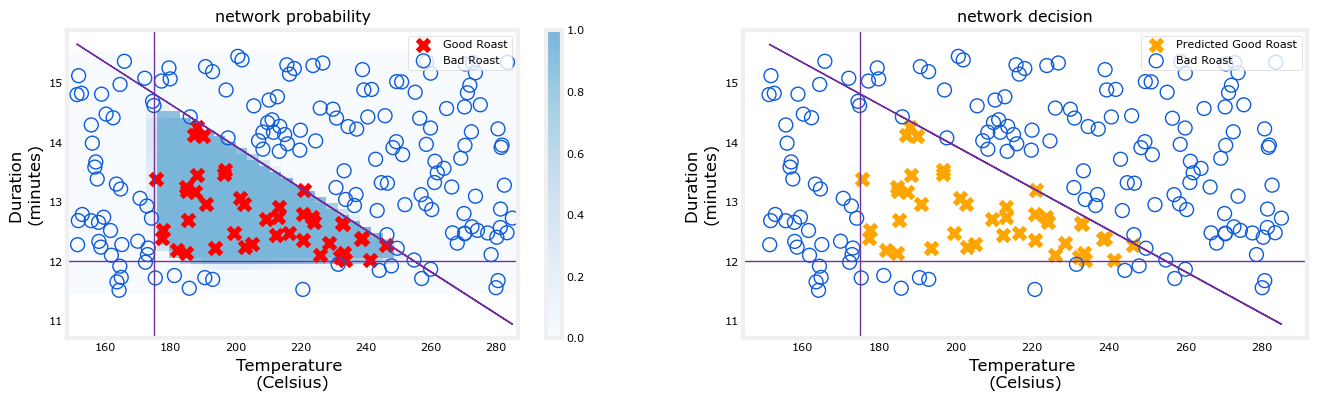

In [104]:
netf = lambda x : my_predict(norm_1(x), W1_tmp, b1_tmp, W2_tmp, b2_tmp)
plt_network(X, Y, netf)